# **MNIST Handwritten Digits Classification using Stochastic Gradient Descent (SGD)**



---

## *What is MNIST?*
### The MNIST database (Modified [National Institute of Standards and Technology](https://en.wikipedia.org/wiki/National_Institute_of_Standards_and_Technology) database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning.It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.
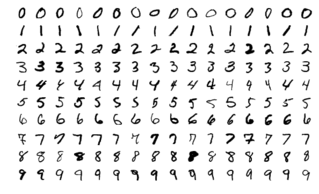

For more information click the link below
[link](https://www.tensorflow.org/datasets/catalog/mnist)

#### **In this notebook we will be seeing about classification of handwritten digits using Stochastic Gradient Descent (SGD)**






 > ## **Import all the required files**



In [27]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics as ms
from sklearn.datasets import fetch_openml
import pickle



 > ## **Import MNIST data and target**



In [4]:
mnist_digits = fetch_openml('mnist_784', version=1)
mnist_digits.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

The MNIST dataset is already divided into data and target labels. Let’s extract it now

In [5]:
x = mnist_digits["data"]
y = mnist_digits["target"]

Let's see the shape of the data and target

In [6]:
x.shape , y.shape

((70000, 784), (70000,))

Let's analyse some digits

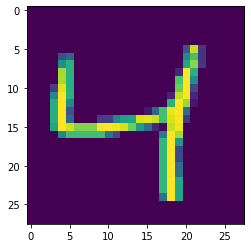

In [14]:
sample_a = x.loc[[2]].to_numpy()
sample_b = x.loc[[25]].to_numpy()

sample_a_img = sample_a.reshape(28, 28)
sample_b_img = sample_b.reshape(28, 28)

plt.imshow(sample_a_img) 

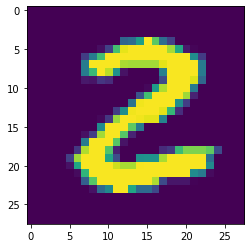

In [15]:
plt.imshow(sample_b_img)

**Wow... our data looks good ...**
*Let's get to the next step!*



 > ## **Split the data**



In [17]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

*Now let we start to train a SGD classifier ( Multiclass Classication )*




> ## **Train our model**



**Stochastic Gradient Descent (SGD):**
The word ‘stochastic‘ means a system or a process that is linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset. Although, using the whole dataset is really useful for getting to the minima in a less noisy and less random manner, but the problem arises when our datasets get big. 


Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima are reached. Hence, it becomes computationally very expensive to perform.
This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

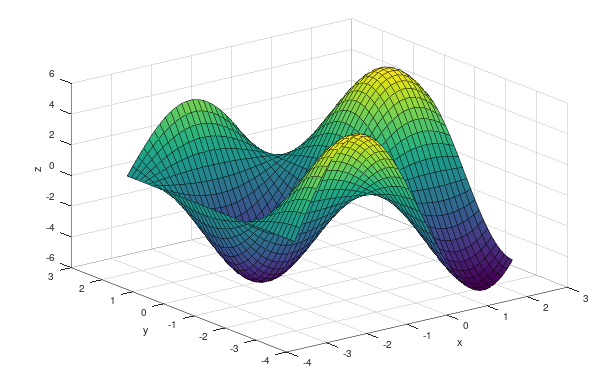

In [19]:
model = SGDClassifier(random_state=42)
model.fit(x_train, y_train) 

SGDClassifier(random_state=42)

Let's check the accuracy of our model using testing data

In [20]:
a = cross_val_score(model, x_test, y_test, cv=3, scoring="accuracy")

In [21]:
a

array([0.82783443, 0.85448545, 0.8919892 ])

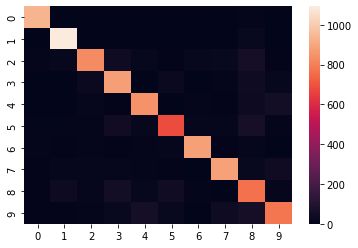

In [29]:
y_test_pred = cross_val_predict(model, x_test, y_test, cv=3)
c = confusion_matrix(y_test, y_test_pred)
sns.heatmap(c, annot=False)

Let us dump our model

In [30]:
pickle.dump(model, open('mnist_sgd.pkl', 'wb')) 